# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Restauração de imagens usando a Transformada Rápida de Fourier

 A Transformada Rápida de Fourier converte uma image do domínio do espaço para uma representação no domínio da frequência. 
 
 Faça uma análise das frequências obtidas para a [imagem](https://drive.google.com/file/d/1NHo1RJdoQfSmzD0dOkFQb8Ib2GBcQipT/view?usp=sharing) abaixo e, utilizando uma máscara apropriada, remova as frequências indesejadas para remover o ruído.


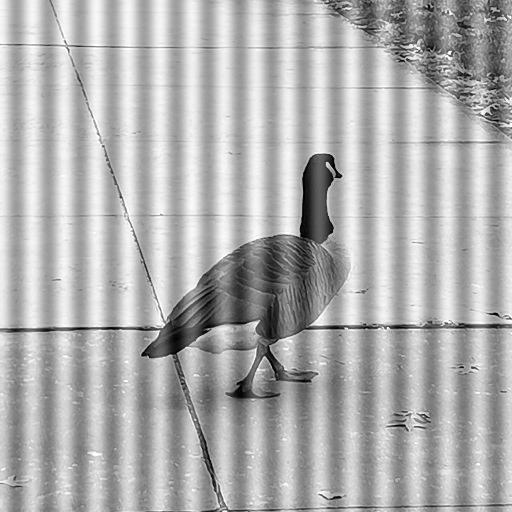



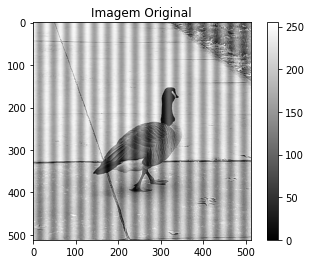

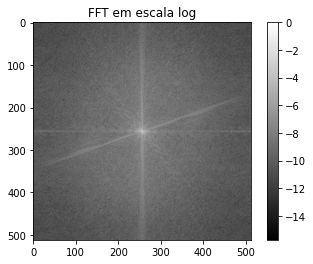

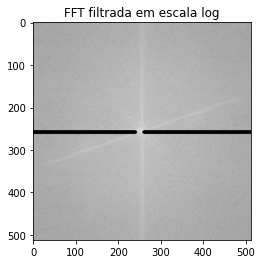

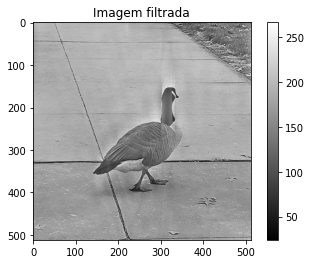

In [ ]:
# seu código aqui
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack as fp

img = cv2.imread('/content/drive/MyDrive/PDI/Trabalho2/img1.jpg',0)

cmap='gray'
w, h = img.shape # w = h = 512
H = np.ones((w, h)) # filtro


cv2.line(H, (0, 258), (240, 258), 0, 7)
cv2.line(H, (260, 258), (512, 258), 0, 7)


plt.figure()
plt.title('Imagem Original')
plt.imshow(img, cmap=cmap)
plt.colorbar()


H = fp.fftshift(H) #filtro passa-baixa
F = fp.fft2(img)


#tratando a FFT para os gráficos
Fm = np.absolute(F)
Fm /= Fm.max()
Fm = fp.fftshift(Fm)
Fm = np.log(Fm)


#mostrando a FFT em escala logaritmica
plt.figure()
plt.title('FFT em escala log')
plt.imshow(Fm, cmap=cmap)
plt.colorbar()

# aplicando o filtro
Fg = F*H
plt.figure()
plt.title('FFT filtrada em escala log')
Fga = np.absolute(Fg)
Fga = fp.fftshift(Fga)
Fga = np.log(Fga+1e-6)
plt.imshow(Fga, cmap=cmap)


# obtendo a transformada inversa, que é o sinal original (a imagem) filtrado
f_blurred = fp.ifft2(Fg)
f_blurred = np.absolute(f_blurred)

plt.figure()
plt.title('Imagem filtrada')
plt.imshow(f_blurred, cmap=cmap)
plt.colorbar()

plt.show()


#2. Erosão e Dilatação

Crie duas funções chamadas videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento semelhante para videoDilatacao(), porém fazendo o oposto da operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">clique aqui</a>.

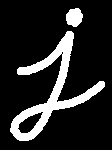

In [ ]:
import numpy as np
import cv2

def erosao(image, i):
    kernel = np.ones((i, i), np.uint8)
    erosao = cv2.erode(image, kernel, iterations=1)
    return erosao


def dilatacao(image, i):
    kernel = np.ones((i, i), np.uint8)
    dilatacao = cv2.dilate(image, kernel, iterations=1)
    return dilatacao


src = cv2.imread('img2.png')
#src = cv2.imread('/content/drive/MyDrive/PDI/Trabalho2/img2.png', 0)

kernel = np.ones((2, 2), np.uint8)

# Gerando o video
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
Erosao = cv2.VideoWriter('Erosao.avi', fourcc, 20.0, (640, 480))
Dilatacao = cv2.VideoWriter('Dilatacao.avi', fourcc, 20.0, (640, 480))

for i in range(1, 100):

    fDilatacao = dilatacao(src, i)
    fDilatacao2 = cv2.resize(fDilatacao, (640, 480), interpolation=cv2.INTER_AREA)
    Dilatacao.write(fDilatacao2)

for i in range(1, 25):

    fErosao = erosao(src, i)
    fErosao2 = cv2.resize(fErosao, (640, 480), interpolation=cv2.INTER_AREA)
    Erosao.write(fErosao2)

Erosao.release()
Dilatacao.release()



Links para os vídeos:

#3. Detecção de linhas usando a Transformada de Hough

A Transformada de Hough é uma técnica que auxilia na detecção de formas geométricas em imagens digitais. 

Nesta aplicação, você deverá identificar as linhas que limitam uma via para que um carro autônomo possa seguir em tempo real. Devido a mudanças de iluminação, será necessário utilizar a transformada de Hough para conectar retas desconectadas. Utilize o seguinte [vídeo](https://drive.google.com/file/d/1G33NiG3rQuec-1hC-FshmjhLWiU1bGtO/view?usp=sharing) como entrada do algoritmo. O resultado de um frame deve ser como a imagem abaixo.

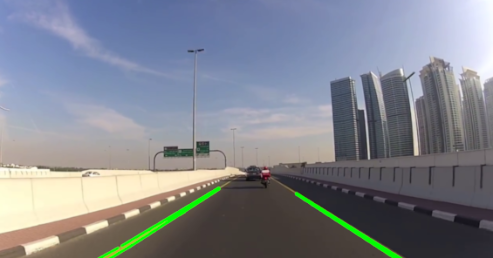

In [ ]:
# seu código aqui
import cv2
import numpy as np

# Lendo o video
cap = cv2.VideoCapture('road_car_view.mp4')

while True:
	ret, frame = cap.read() # Lendo os frames do video

	# Temos que detectar as linhas que são amarelas, logo trataremos as cores no padrão HSV	
	# Será definido um valor de amarelo minimo e amarelo maximo, para que assim a linha possa ser reconhecida no video

	hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

	# Criando a mascara do amarelo em HSV
	lower_yellow = np.array([18, 94, 140]) # Amarelo minimo em HSV
	upper_yellow = np.array([48,255,255]) # Amarelo maximo em HSV
	mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

	edges = cv2.Canny(mask, 75, 150)

	# Aplicando Transformada de Hough

	lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)

	if lines is not None:
		for line in lines:
			x1, y1, x2, y2 = line[0]
			cv2.line(frame, (x1,y1), (x2, y2), (0, 255, 0), 5)


	cv2.imshow("Frame", frame)
	cv2.imshow("Edge", edges)

	key = cv2.waitKey(25) # Esperando 25 milisegundos entre cada frame
	if key == 27:
		break

cap.release()
cv2.destroyAllWindows()

#4. Segmentação de Imagens com K-Means

Quando falamos de segmentação de imagens, dizemos que vamos localizar segmentos das imagens. Um algoritmo que realiza essa tarefa é o K-Means.

No vídeo abaixo é apresentado como usar esse algoritmo para fazer quantização de imagens, ou seja, representar as cores originais em menos quantidades.

Dito isso, assista o vídeo abaixo e implemente um algoritmo que transforma qualquer imagem em um gráfico para jogo 8 bits. Assim, pegue uma imagem e gere ela novamente com apenas 256 cores usando o K-means.

<a href="https://www.youtube.com/watch?v=iHlve4t5z-0"><img src="https://img.youtube.com/vi/iHlve4t5z-0/mqdefault.jpg"/></a>

OBS: O algoritmo K-means é discutido em mais detalhes nos vídeos abaixo.

<a href="https://www.youtube.com/watch?v=2hsMErlQtcI"><img src="https://img.youtube.com/vi/2hsMErlQtcI/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=p2twwtegYkU"><img src="https://img.youtube.com/vi/p2twwtegYkU/mqdefault.jpg"/></a>

In [ ]:
from cv2 import destroyAllWindows
import numpy as np
import cv2
from matplotlib import pyplot as plt

def computeKmeans(image, K): # K = Quantidade de Imagens que a imagem vai ter
    Z = image.reshape((-1, 3)) # Redimensionando a imagem para um altura que eu não sei ainda, mas uma largura de 3 (que corresponde aos campos R, G e B)
    Z = np.float32(Z) # Convertendo Z para float, pois o KMeans so trabalha em float

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.1) # 2 criterios para encerrar o algoritmo
    
    _, labels, centroides = cv2.kmeans(Z, K, None, criteria, 40, cv2.KMEANS_RANDOM_CENTERS)

    centroides = np.uint8(centroides)
    imagemColoridaComCentroides = centroides[labels.flatten()]
    imagemFinal = imagemColoridaComCentroides.reshape((image.shape))

    return imagemFinal


if __name__ == "__main__":
    img = cv2.imread('vingadores.jpg')
    cv2.imshow("Imagem Original", img)
    
    cv2.imshow("Imagem 8 cores", computeKmeans(img, 8))
    
    cv2.imshow("Imagem 256 cores", computeKmeans(img, 256))
    
    cv2.waitKey(0)

    cv2.destroyAllWindows()

    
    

#5. Segmentação usando o algoritmo GrabCut

Quando o assunto é obter o segmento exato que contém um objeto, o algoritmo GrabCut é excelente.

Nos vídeos abaixos há exemplos de sua implementação. 

<a href="https://www.youtube.com/watch?v=HBp6vQXFQgc"><img src="https://img.youtube.com/vi/HBp6vQXFQgc/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=DyRfAIQfVug"><img src="https://img.youtube.com/vi/DyRfAIQfVug/mqdefault.jpg"/></a>

Baseado nisso e nos conhecimentos anteriores, crie um algoritmo que segmente sua imagem e adicione por cima do fundo o efeito de borramento, usando um dos filtros explicados em lições passadas.

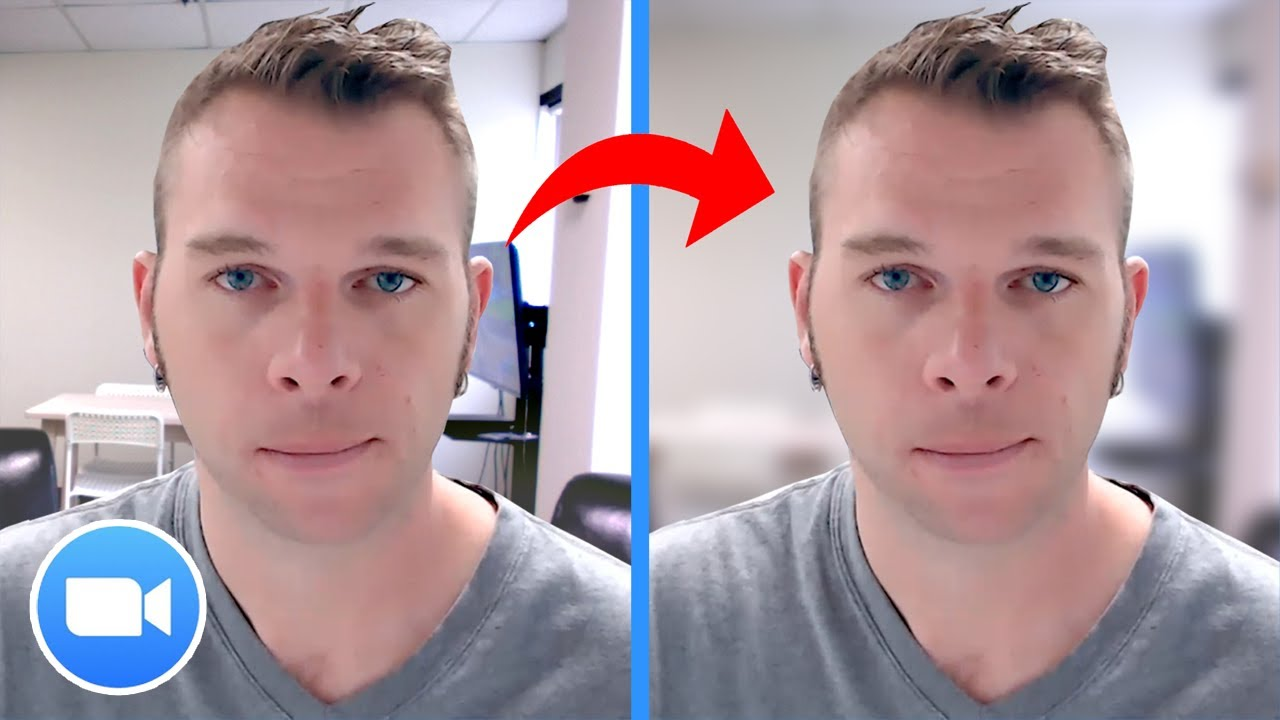

In [ ]:
# seu código aqui
from tkinter import filedialog
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import Frame
import cv2
import numpy as np

class GrabCutGUI(Frame):
    def __init__(self, master = None):

        Frame.__init__(self, master)

        self.iniciaUI()

    def iniciaUI(self):
        
        self.master.title("Janela da Imagem Segmentada")
        self.pack()

        self.computaAcoesDoMouse()

        self.imagem = self.carregaImagemASerExibida()

        self.canvas = Canvas(self.master, width = self.imagem.width(), height = self.imagem.height(), cursor = "cross")

        self.canvas.create_image(0, 0, anchor = NW, image = self.imagem)
        self.canvas.image = self.imagem 

        
        self.canvas.pack()

    def computaAcoesDoMouse(self):
        self.startX = None
        self.startY = None
        self.rect   = None
        self.rectangleReady = None
        
        self.master.bind("<ButtonPress-1>", self.callbackBotaoPressionado)
        self.master.bind("<B1-Motion>", self.callbackBotaoPressionadoEmMovimento)
        self.master.bind("<ButtonRelease-1>", self.callbackBotaoSolto)

    def callbackBotaoSolto(self, event):
        if self.rectangleReady:

            windowGrabcut = Toplevel(self.master)
            windowGrabcut.wm_title("Segmentation")
            windowGrabcut.minsize(width = self.imagem.width(), height = self.imagem.height())

            canvasGrabcut = Canvas(windowGrabcut, width = self.imagem.width(), height = self.imagem.height())
            canvasGrabcut.pack()

            mask = np.zeros(self.imagemOpenCV.shape[:2], np.uint8)
            print(mask.shape)
            rectGcut = (int(self.startX), int(self.startY), int(event.x - self.startX), int(event.y - self.startY))
            fundoModel = np.zeros((1, 65), np.float64)
            objModel = np.zeros((1, 65), np.float64)

            cv2.grabCut(self.imagemOpenCV, mask, rectGcut, fundoModel, objModel, 5, cv2.GC_INIT_WITH_RECT)

            maskFinal = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
            imgFinal = self.imagemOpenCV * maskFinal[:,:,np.newaxis]
            for x in range(0, self.imagemOpenCV.shape[1]):
                for y in range(0, self.imagemOpenCV.shape[0]):
                    if(maskFinal[y][x] == 0):
                        imgFinal[y][x][0] = imgFinal[y][x][1] = imgFinal[y][x][2] = 255 


            imgFinal = cv2.cvtColor(imgFinal, cv2.COLOR_BGR2RGB)
            imgFinal = Image.fromarray(imgFinal)
            imgFinal = ImageTk.PhotoImage(imgFinal)


            canvasGrabcut.create_image(0, 0, anchor = NW, image = imgFinal)
            canvasGrabcut.image = imgFinal          

    def callbackBotaoPressionadoEmMovimento(self, event):

        currentX = self.canvas.canvasx(event.x)
        currentY = self.canvas.canvasy(event.y)

        self.canvas.coords(self.rect, self.startX, self.startY, currentX, currentY)

        self.rectangleReady = True

    def callbackBotaoPressionado(self, event):

        self.startX = self.canvas.canvasx(event.x)
        self.startY = self.canvas.canvasy(event.y)

        if not self.rect:
            self.rect = self.canvas.create_rectangle(0, 0, 0, 0, outline="blue")

    def carregaImagemASerExibida(self):
        caminhoDaImagem = filedialog.askopenfilename()

        
        self.imagemOpenCV = cv2.imread(caminhoDaImagem)

        image = cv2.cvtColor(self.imagemOpenCV, cv2.COLOR_BGR2RGB)

        image = Image.fromarray(image)

        image = ImageTk.PhotoImage(image)

        return image
            

def main():

    root = Tk()

    appcut = GrabCutGUI(master = root)

    appcut.mainloop()

if __name__ == "__main__":
    main()